<a href="https://colab.research.google.com/github/Ananya-1233/mini_project-sem-4/blob/main/SmileOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d chazzer/smiling-or-not-face-data

 94% 17.0M/18.0M [00:02<00:00, 12.0MB/s]
100% 18.0M/18.0M [00:02<00:00, 8.79MB/s]


In [3]:
import zipfile

zipref = zipfile.ZipFile('/content/smiling-or-not-face-data.zip')
zipref.extractall()
zipref.close()

In [4]:
import os,shutil

os.mkdir("./train")

In [5]:
shutil.copytree("/content/non_smile","./train/non_smile")
shutil.copytree("/content/smile","./train/smile")

'./train/smile'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Using ImageDataGenerator generate batches of tensor image data with real-time data augmentation

train_datagen = ImageDataGenerator(
    rescale = 1/255. ,
    validation_split = 0.1
)

test_datagen = ImageDataGenerator(
    rescale = 1/255.
)

In [8]:
train_df = train_datagen.flow_from_directory('/content/train',
                                             target_size = (128 , 128),
                                             batch_size = 32,
                                             subset = 'training')

val_df = train_datagen.flow_from_directory('/content/train',
                                           target_size = (128 , 128),
                                           batch_size = 32,
                                           subset = 'validation')

test_df = test_datagen.flow_from_directory('/content/test',
                                           target_size = (128 , 128),
                                           batch_size = 32)

Found 1083 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2 , activation = 'softmax')
])

In [17]:
model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [19]:
history = model.fit(train_df,
            epochs = 10,
            validation_data = val_df)

Epoch 1/10
34/34 [==============================] - 1s 25ms/step - loss: 0.2278 - accuracy: 0.9261 - val_loss: 0.3706 - val_accuracy: 0.8333
Epoch 2/10
34/34 [==============================] - 1s 25ms/step - loss: 0.1969 - accuracy: 0.9326 - val_loss: 0.8496 - val_accuracy: 0.6167
Epoch 3/10
34/34 [==============================] - 1s 25ms/step - loss: 0.1767 - accuracy: 0.9326 - val_loss: 0.2998 - val_accuracy: 0.8833
Epoch 4/10
34/34 [==============================] - 1s 25ms/step - loss: 0.1075 - accuracy: 0.9677 - val_loss: 0.2957 - val_accuracy: 0.8667
Epoch 5/10
34/34 [==============================] - 1s 29ms/step - loss: 0.0915 - accuracy: 0.9677 - val_loss: 0.3777 - val_accuracy: 0.8667
Epoch 6/10
34/34 [==============================] - 1s 29ms/step - loss: 0.0752 - accuracy: 0.9788 - val_loss: 0.4160 - val_accuracy: 0.8250
Epoch 7/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0721 - accuracy: 0.9788 - val_loss: 0.3467 - val_accuracy: 0.8417
Epoch 8/10
34

In [20]:
model.evaluate(val_df)

4/4 [==============================] - 0s 20ms/step - loss: 0.3214 - accuracy: 0.9083


[0.32143470644950867, 0.9083333611488342]

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 307522    
                                                                 
Total params: 308,712
Trainable params: 308,712
Non-trainable params: 0
_________________________________________________________________


In [28]:
preds = model.predict(val_df)

4/4 [==============================] - 0s 16ms/step


In [29]:
preds[0]

array([1.2240034e-04, 9.9987757e-01], dtype=float32)

In [15]:
import matplotlib.pyplot as plt

In [24]:
def plot_loss_curves(history):

  loss = history.history['loss']
  accuracy = history.history['accuracy']

  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot the loss curves
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs , val_loss , label = 'validation_loss')
  plt.title('Loss curve')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'validation_accuracy')
  plt.title('Accuracy curve')
  plt.xlabel('Epochs')
  plt.legend()

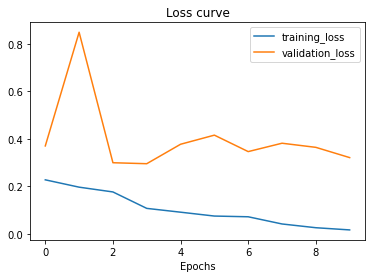

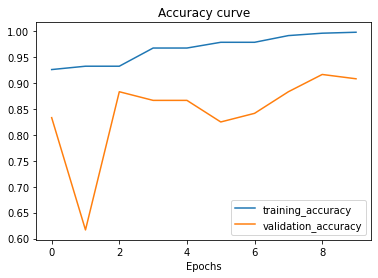

In [25]:
plot_loss_curves(history = history)

In [26]:
def load_image(filename , img_shape = 128):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img , channels = 3)

  img = tf.image.resize(img , size = [img_shape , img_shape])

  img = img/255.

  return img

In [27]:
classnames = ['Smiling' , 'Not Smiling']

In [30]:
def predict_on_img(model , filename , classnames):

  img = load_image(filename)

  pred = model.predict(tf.expand_dims(img , axis = 0))

  pred_class = classnames[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f'Predicted_class: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 15ms/step


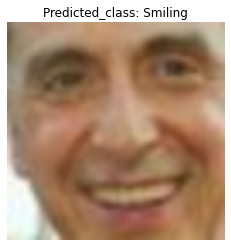

In [36]:
predict_on_img(model , '/content/test/Al_Pacino_0003.jpg' , classnames)